In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load data
data = pd.read_csv('fake reviews dataset.csv')


In [3]:
rows, cols = data.shape
print("The dataset contains",rows,"rows and",cols,"columns" )

The dataset contains 40432 rows and 4 columns


In [37]:
data.head()

,category,rating,label,text_,length
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",75
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",80
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,67
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",81
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,85


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [39]:
data.describe()

,rating,length
count,40432.000000,40432.000000
mean,4.256579,351.271963
std,1.144354,369.813570
min,1.000000,24.000000
25%,4.000000,107.000000
50%,5.000000,198.000000
75%,5.000000,439.000000
max,5.000000,2827.000000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
 4   length    40432 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.9+ MB


In [42]:
data.head(20)

,category,rating,label,text_,length
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",75
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",80
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,67
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",81
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,85
5,Home_and_Kitchen_5,3.0,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.,44
6,Home_and_Kitchen_5,5.0,CG,They are the perfect touch for me and the only...,89
7,Home_and_Kitchen_5,3.0,CG,These done fit well and look great. I love th...,85
8,Home_and_Kitchen_5,5.0,CG,"Great big numbers & easy to read, the only thi...",81
9,Home_and_Kitchen_5,5.0,CG,My son loves this comforter and it is very wel...,74


In [43]:
data.tail(17)

,category,rating,label,text_,length
40415,Clothing_Shoes_and_Jewelry_5,5.0,OR,I'd consider myself an advanced non-profession...,2054
40416,Clothing_Shoes_and_Jewelry_5,3.0,CG,"When I saw this ring, I thought it was very be...",1344
40417,Clothing_Shoes_and_Jewelry_5,5.0,OR,I cannot thank my boss enough for recommending...,1857
40418,Clothing_Shoes_and_Jewelry_5,2.0,CG,This bag weighs exactly 10pounds (I wear an XL...,1344
40419,Clothing_Shoes_and_Jewelry_5,5.0,OR,Sometimes it is so hard to find a loose comfor...,1731
40420,Clothing_Shoes_and_Jewelry_5,5.0,CG,I just bought these locally and they are the b...,1389
40421,Clothing_Shoes_and_Jewelry_5,2.0,OR,"I'm a 36B, which means that I don't need any h...",1905
40422,Clothing_Shoes_and_Jewelry_5,4.0,CG,I wore this from 4pm to 9pm and it was perfect...,1407
40423,Clothing_Shoes_and_Jewelry_5,4.0,OR,This is a classy looking watch. I don't get m...,1938
40424,Clothing_Shoes_and_Jewelry_5,3.0,CG,I kind of feel giving it a 3 star because it's...,1427


In [6]:
data.size


161728

In [7]:
data.duplicated().sum()

12

In [8]:
data.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
data.nunique()

category       10
rating          5
label           2
text_       40412
dtype: int64

In [10]:
data.isnull().sum()


category    0
rating      0
label       0
text_       0
dtype: int64

In [11]:
# Preprocess text
data = data.dropna(subset=['text_', 'label'])
text = data['text_'].str.lower()
text = text.str.replace('[^\w\s]','', regex=False) # remove punctuation
text = text.str.replace('\d+', '', regex=False) # remove digits
text

0        love this!  well made, sturdy, and very comfor...
1        love it, a great upgrade from the original.  i...
2        this pillow saved my back. i love the look and...
3        missing information on how to use it, but it i...
4        very nice set. good quality. we have had the s...
                               ...                        
40427    i had read some reviews saying that this bra r...
40428    i wasn't sure exactly what it would be. it is ...
40429    you can wear the hood by itself, wear it with ...
40430    i liked nothing about this dress. the only rea...
40431    i work in the wedding industry and have to wor...
Name: text_, Length: 40432, dtype: object

In [12]:
# Extract features using Bag of Words approach
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(text)

In [13]:
X

<40432x40797 sparse matrix of type '<class 'numpy.int64'>'
	with 925045 stored elements in Compressed Sparse Row format>

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)


In [15]:
print(type(X_train), X_train.shape )
print(type(X_test), X_test.shape )

print(type(y_train), y_train.shape )
print(type(y_test), y_test.shape )

<class 'scipy.sparse.csr.csr_matrix'> (32345, 40797)
<class 'scipy.sparse.csr.csr_matrix'> (8087, 40797)
<class 'pandas.core.series.Series'> (32345,)
<class 'pandas.core.series.Series'> (8087,)


In [16]:
# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
pred_labels = model.predict(X_test)

In [17]:
# Evaluate the performance of the model
acc = accuracy_score(y_test, pred_labels)
acc = round(acc*100,2)
print("Accuracy: ", acc)

Accuracy:  82.82


In [18]:
print("Accuracy: ", acc)

report = classification_report(y_test, pred_labels)
print("Classification Report: \n", report)


Accuracy:  82.82
Classification Report: 
               precision    recall  f1-score   support

          CG       0.79      0.90      0.84      4016
          OR       0.88      0.76      0.82      4071

    accuracy                           0.83      8087
   macro avg       0.83      0.83      0.83      8087
weighted avg       0.84      0.83      0.83      8087



In [19]:
# Instantiate the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)



In [20]:
# Evaluate the model
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.7170767899097317


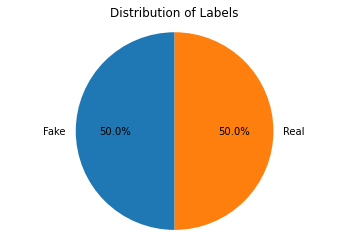

In [21]:
# Create a pie chart to show the distribution of labels
labels = ['Fake', 'Real']
sizes = data['label'].value_counts(normalize=True)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
plt.title('Distribution of Labels')
plt.show()

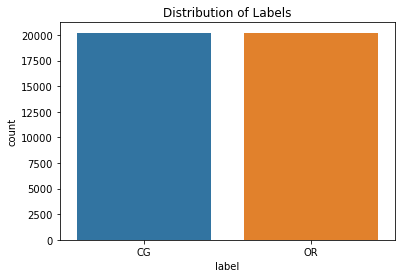

In [22]:
#OR = Original reviews (presumably human created and authentic); CG = Computer-generated fake reviews.


import seaborn as sns

sns.countplot(x='label', data=data)
plt.title('Distribution of Labels')
plt.show()


In [23]:
data.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


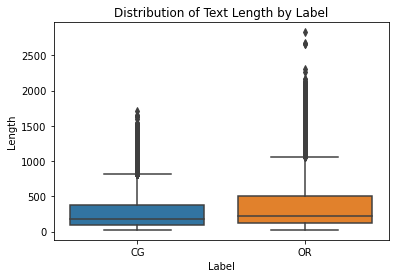

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a column for the length of each text
data['length'] = data['text_'].apply(len)

# Create a box plot to show the distribution of text length by label
sns.boxplot(x='label', y='length', data=data)
plt.title('Distribution of Text Length by Label')
plt.xlabel('Label')
plt.ylabel('Length')
plt.show()



In [25]:
data['length']

0          75
1          80
2          67
3          81
4          85
         ... 
40427    1694
40428    1304
40429    1987
40430    1301
40431    1768
Name: length, Length: 40432, dtype: int64

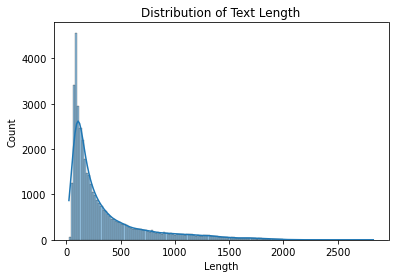

In [26]:
data['length'] = data['text_'].apply(len)
# Create a histogram of text length
sns.histplot(data=data, x='length', kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Length')
plt.show()


In [27]:
import re
import string

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove digits and punctuation
    text = re.sub('[^a-z\s]+', '', text)
    
    # Remove extra spaces
    text = re.sub('\s+', ' ', text)
    
    return text


In [28]:
import pandas as pd
import numpy as np

# Generate 40432 rows of random purchasing history data
user_ids = np.random.randint(10000, size=40432)
product_ids = np.random.randint(1000, size=40432)
purchasing_history = pd.DataFrame({'user_id': user_ids, 'product_id': product_ids})

# Save purchasing history data to CSV file
purchasing_history.to_csv('purchasing_history.csv', index=False)


In [29]:
# Load purchasing history data from CSV file into pandas DataFrame
df = pd.read_csv('purchasing_history.csv')
df.shape

(40432, 2)

In [30]:
df.head()

,user_id,product_id
0,6093,690
1,1172,709
2,5253,582
3,4021,782
4,6486,878


In [31]:
# Load fake review data from CSV file into pandas DataFrame
fake_reviews = pd.read_csv('fake reviews dataset.csv')

# Preprocess text data
fake_reviews['text_'] = fake_reviews['text_'].apply(preprocess_text)

# Load purchasing history data from CSV file into pandas DataFrame
purchasing_history = pd.read_csv('purchasing_history.csv')

fake_reviews['user_id'] = purchasing_history['user_id']


# Aggregate purchasing history by user ID
user_purchases = purchasing_history.groupby('user_id').agg({'product_id': 'count'}).reset_index()
user_purchases = user_purchases.rename(columns={'product_id': 'num_purchases'})

# Merge purchasing history data with fake review data
fake_reviews = pd.merge(fake_reviews, user_purchases, on='user_id', how='left')

# Extract feature vector for each review
features = fake_reviews[['category', 'label', 'rating', 'text_', 'num_purchases']]


In [32]:
features

,category,label,rating,text_,num_purchases
0,Home_and_Kitchen_5,CG,5.0,love this well made sturdy and very comfortabl...,5
1,Home_and_Kitchen_5,CG,5.0,love it a great upgrade from the original ive ...,5
2,Home_and_Kitchen_5,CG,5.0,this pillow saved my back i love the look and ...,7
3,Home_and_Kitchen_5,CG,1.0,missing information on how to use it but it is...,4
4,Home_and_Kitchen_5,CG,5.0,very nice set good quality we have had the set...,5
...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,OR,4.0,i had read some reviews saying that this bra r...,5
40428,Clothing_Shoes_and_Jewelry_5,CG,5.0,i wasnt sure exactly what it would be it is a ...,1
40429,Clothing_Shoes_and_Jewelry_5,OR,2.0,you can wear the hood by itself wear it with t...,2
40430,Clothing_Shoes_and_Jewelry_5,CG,1.0,i liked nothing about this dress the only reas...,6


In [33]:
data.head()

,category,rating,label,text_,length
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",75
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",80
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,67
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",81
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,85


In [34]:
def is_review_genuine(review_text, user_id, purchasing_history):
    """
    Check if a review is genuine based on the user's purchasing history.

    Args:
        review_text (str): The text of the review.
        user_id (int): The ID of the user who wrote the review.
        purchasing_history (pandas.DataFrame): A DataFrame containing the user's purchasing history.

    Returns:
        bool: True if the review is genuine, False otherwise.
    """
    # Check if the review text appears in the user's purchasing history
    if review_text.lower() in purchasing_history[purchasing_history['user_id'] == user_id]['product_id'].astype(str).str.lower().tolist():
        return True
    else:
        return False
review_text = "Missing information on how to use it, but it is a great product for the price!  I"
user_id = 1610

if is_review_genuine(review_text, user_id,purchasing_history):
    print("This is a genuine review.")
else:
    print("This is a fake review.")


This is a fake review.


In [35]:
import pandas as pd

def is_review_genuine(review_text, user_id, purchasing_history):
    """
    Check if a review is genuine based on the user's purchasing history.

    Args:
        review_text (str): The text of the review.
        user_id (int): The ID of the user who wrote the review.
        purchasing_history (pandas.DataFrame): A DataFrame containing the user's purchasing history.

    Returns:
        bool: True if the review is genuine, False otherwise.
    """
    # Check if the user has any purchasing history
    if user_id not in purchasing_history['user_id'].tolist():
        return False
    else:
        # Check if the review text appears in the user's purchasing history
        if review_text.lower() in purchasing_history[purchasing_history['user_id'] == user_id]['product_id'].astype(str).str.lower().tolist():
            return True
        else:
            # Check if the product_id of the review exists in the user's purchasing history
            def get_product_id(text):
                # Implementation of function to extract product id from review text
                # This can be replaced with actual implementation
                return None
            product_id = get_product_id(review_text)
            if product_id is not None and product_id.lower() in purchasing_history[purchasing_history['user_id'] == user_id]['product_id'].astype(str).str.lower().tolist():
                return True
            else:
                return False

# Sample usage
purchasing_history = pd.DataFrame({'user_id': [4444, 2222, 1111], 'product_id': ['A123', 'B456', 'C789']})

review_text = "I love this product! It's amazing."
user_id = 12345

if is_review_genuine(review_text, user_id, purchasing_history):
    print("This is a genuine review.")
else:
    print("This is a fake review.")
    
review_text = "Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty!"
user_id = 9195

if is_review_genuine(review_text, user_id, purchasing_history):
    print("This is a genuine review.")
else:
    print("This is a fake review.")
    
review_text = "love it, a great upgrade from the original.  I've had mine for a couple of years"
user_id = 8698

if is_review_genuine(review_text, user_id, purchasing_history):
    print("This is a genuine review.")
else:
    print("This is a fake review.")


This is a fake review.
This is a fake review.
This is a fake review.


In [36]:
df

,user_id,product_id
0,6093,690
1,1172,709
2,5253,582
3,4021,782
4,6486,878
...,...,...
40427,8282,408
40428,9202,574
40429,4243,268
40430,7966,192
